In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import (accuracy_score, roc_auc_score, matthews_corrcoef,
                             recall_score, precision_score, confusion_matrix)
from sklearn.model_selection import train_test_split


# Load your dataset
df = pd.read_excel("./default of credit card clients.xls", skiprows=[0])
df = df[df.columns[1:]]
df.rename({'default payment next month': 'Risk'}, axis=1, inplace=True)

In [19]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Risk'],
      dtype='object')

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


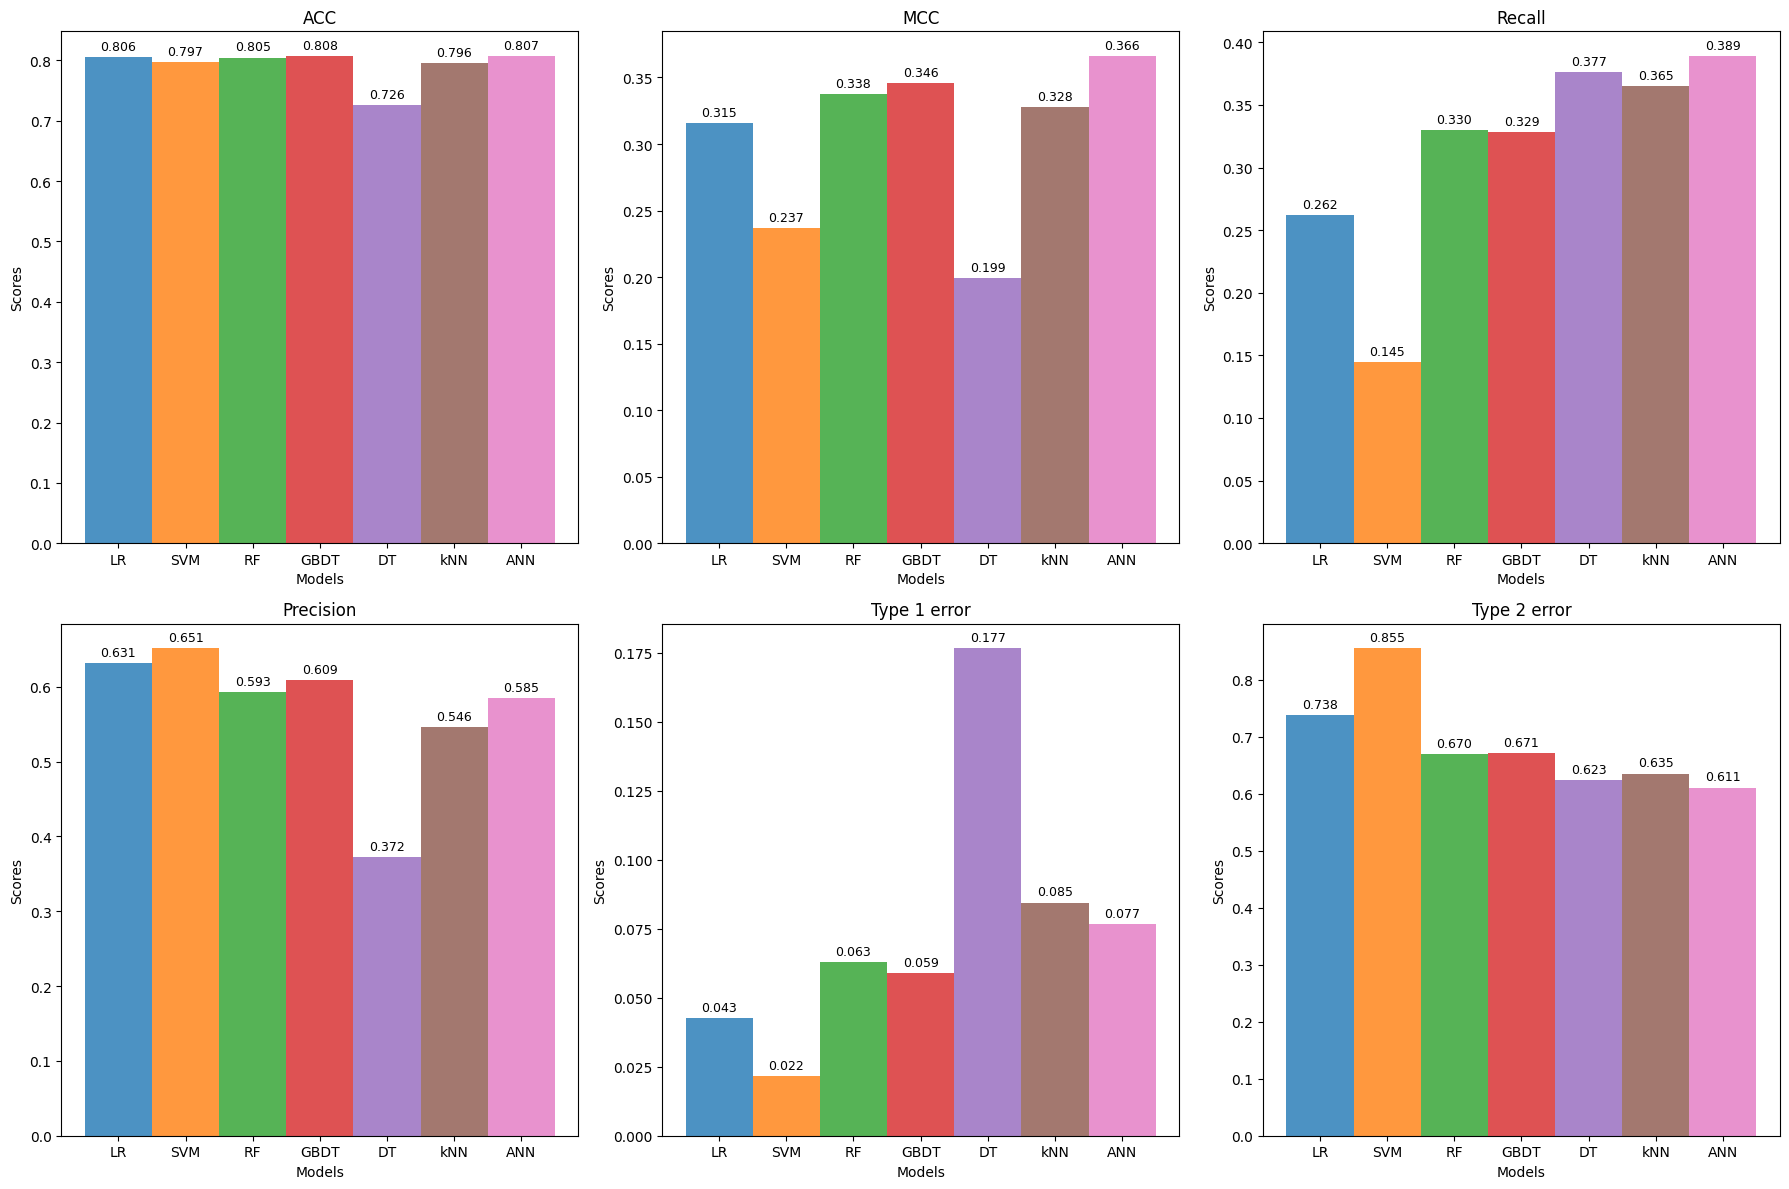

In [22]:


df.fillna("no_info", inplace=True)

# Preprocess your data
X = df.drop("Risk", axis=1)
y = df["Risk"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Define the columns to be standardized and one-hot encoded
cat_features = ['SEX', 'EDUCATION', 'MARRIAGE']

num_features = X.drop(cat_features, axis=1).columns.tolist()


# Create a column transformer with the respective transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)

kmeans = KMeans(n_clusters=30, random_state=42)
X_clustered = kmeans.fit_transform(X_processed)

# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_clustered, y_encoded, test_size=0.3, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.3, random_state=42)

# Define the models
models = {
    "LR": LogisticRegression(),
    "SVM": SVC(probability=True),
    "RF": RandomForestClassifier(),
    "GBDT": GradientBoostingClassifier(),
    "DT": DecisionTreeClassifier(),
    "kNN": KNeighborsClassifier(),
    "ANN": MLPClassifier()
}

# Train and evaluate the models
results_2 = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)
    mcc = matthews_corrcoef(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    type_1_error = fp / (fp + tn)
    type_2_error = fn / (fn + tp)
    results_2.append([name, acc, mcc, recall, precision, type_1_error, type_2_error])

# Display the results in a DataFrame
metrics = ["ACC", "MCC", "Recall", "Precision", "Type 1 error", "Type 2 error"]

results_df = pd.DataFrame(results_2, columns=["Model", "ACC", "MCC", "Recall", "Precision", "Type 1 error", "Type 2 error"])

# Function to add labels on the bars
def add_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            '{:.3f}'.format(height),
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center',
            va='bottom',
            fontsize=9
        )

# Plot the evaluation metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()
bar_width = 0.1
opacity = 0.8

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    bars = []
    for i, (name, row) in enumerate(results_df.set_index("Model").iterrows()):
        bar = ax.bar(i * bar_width, row[metric], bar_width, alpha=opacity, label=name)
        bars.append(bar[0])
    
    add_labels(ax, bars)
    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title(metric)
    ax.set_xticks([i * bar_width for i in range(len(results_df))])
    ax.set_xticklabels(results_df['Model'])
    # ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
results_2

In [24]:


df.fillna("no_info", inplace=True)

# Preprocess your data
X = df.drop("Risk", axis=1)
y = df["Risk"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Define the columns to be standardized and one-hot encoded
cat_features = ['SEX', 'EDUCATION', 'MARRIAGE']

num_features = X.drop(cat_features, axis=1).columns.tolist()


# Create a column transformer with the respective transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)

kmeans = KMeans(n_clusters=30, random_state=42)
X_clustered = kmeans.fit_transform(X_processed)

# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_clustered, y_encoded, test_size=0.3, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.3, random_state=42)

# Define the models
models = {
    "LR": LogisticRegression(),
    "SVM": SVC(probability=True),
    "RF": RandomForestClassifier(),
    "GBDT": GradientBoostingClassifier(),
    "DT": DecisionTreeClassifier(),
    "kNN": KNeighborsClassifier(),
    "ANN": MLPClassifier()
}

# Train and evaluate the models
results_4 = []

# Train the models
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model

from minisom import MiniSom

# Get outputs from each model
outputs = []
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    outputs.append(y_pred)

# Create an input matrix with outputs from each model as columns
input_matrix = np.column_stack(outputs)

# Train a SOM model
som_size = 10
som = MiniSom(som_size, som_size, input_matrix.shape[1], sigma=1.0, learning_rate=0.5)
som.train_random(input_matrix, 1000)

# Use the SOM to predict the final output
final_output = []
for x in input_matrix:
    winning_coords = som.winner(x)
    final_output.append(winning_coords)

from collections import Counter
from sklearn.metrics import accuracy_score, matthews_corrcoef, recall_score, precision_score, confusion_matrix

# Compute the majority class for each winning coordinate in the SOM
winning_coords_counter = Counter(tuple(coord) for coord in final_output)
majority_classes = {}
for coord, count in winning_coords_counter.items():
    majority_classes[coord] = Counter(y_test[idx] for idx, coord_ in enumerate(final_output) if coord_ == coord).most_common(1)[0][0]

# Calculate the majority class predictions
y_pred_majority = [majority_classes[coord] for coord in final_output]

# Calculate the evaluation metrics
acc = accuracy_score(y_test, y_pred_majority)
mcc = matthews_corrcoef(y_test, y_pred_majority)
recall = recall_score(y_test, y_pred_majority)
precision = precision_score(y_test, y_pred_majority)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
type_1_error = fp / (fp + tn)
type_2_error = fn / (fn + tp)

results_4.append(['Consensus', acc, mcc, recall, precision, type_1_error, type_2_error])

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
results1_df = pd.DataFrame(results_1, columns=["Model", "ACC", "MCC", "Recall", "Precision", "Type 1 error", "Type 2 error"])
results1_df['model_type'] = 'individual'

results2_df = pd.DataFrame(results_2, columns=["Model", "ACC", "MCC", "Recall", "Precision", "Type 1 error", "Type 2 error"])
results2_df['model_type'] = 'cluster-based'

results3_df = pd.DataFrame(results_3, columns=["Model", "ACC", "MCC", "Recall", "Precision", "Type 1 error", "Type 2 error"])
results3_df['model_type'] = 'individual'

results4_df = pd.DataFrame(results_4, columns=["Model", "ACC", "MCC", "Recall", "Precision", "Type 1 error", "Type 2 error"])
results4_df['model_type'] = 'cluster-based'

In [26]:
results_df=pd.DataFrame()
results_df = pd.concat([results1_df, results2_df, results3_df, results4_df])

In [27]:
results_df['Type 1 error'] = results_df['Type 1 error']/5

In [28]:
results_df.reset_index(drop=True)

,Model,ACC,MCC,Recall,Precision,Type 1 error,Type 2 error,model_type
0,LR,0.809556,0.320351,0.234694,0.682493,0.006080,0.765306,individual
1,SVM,0.818556,0.379521,0.330612,0.668731,0.009119,0.669388,individual
2,RF,0.813889,0.375839,0.363776,0.624890,0.012159,0.636224,individual
3,GBDT,0.820111,0.390959,0.353061,0.663471,0.009972,0.646939,individual
4,DT,0.722889,0.217963,0.418367,0.377185,0.038466,0.581633,individual
5,kNN,0.791889,0.308825,0.341837,0.534717,0.016563,0.658163,individual
6,ANN,0.806000,0.340367,0.328061,0.599813,0.012188,0.671939,individual
7,LR,0.805889,0.315494,0.261735,0.630996,0.008523,0.738265,cluster-based
8,SVM,0.796889,0.237039,0.144898,0.651376,0.004318,0.855102,cluster-based
9,RF,0.804778,0.337682,0.330102,0.593034,0.012614,0.669898,cluster-based


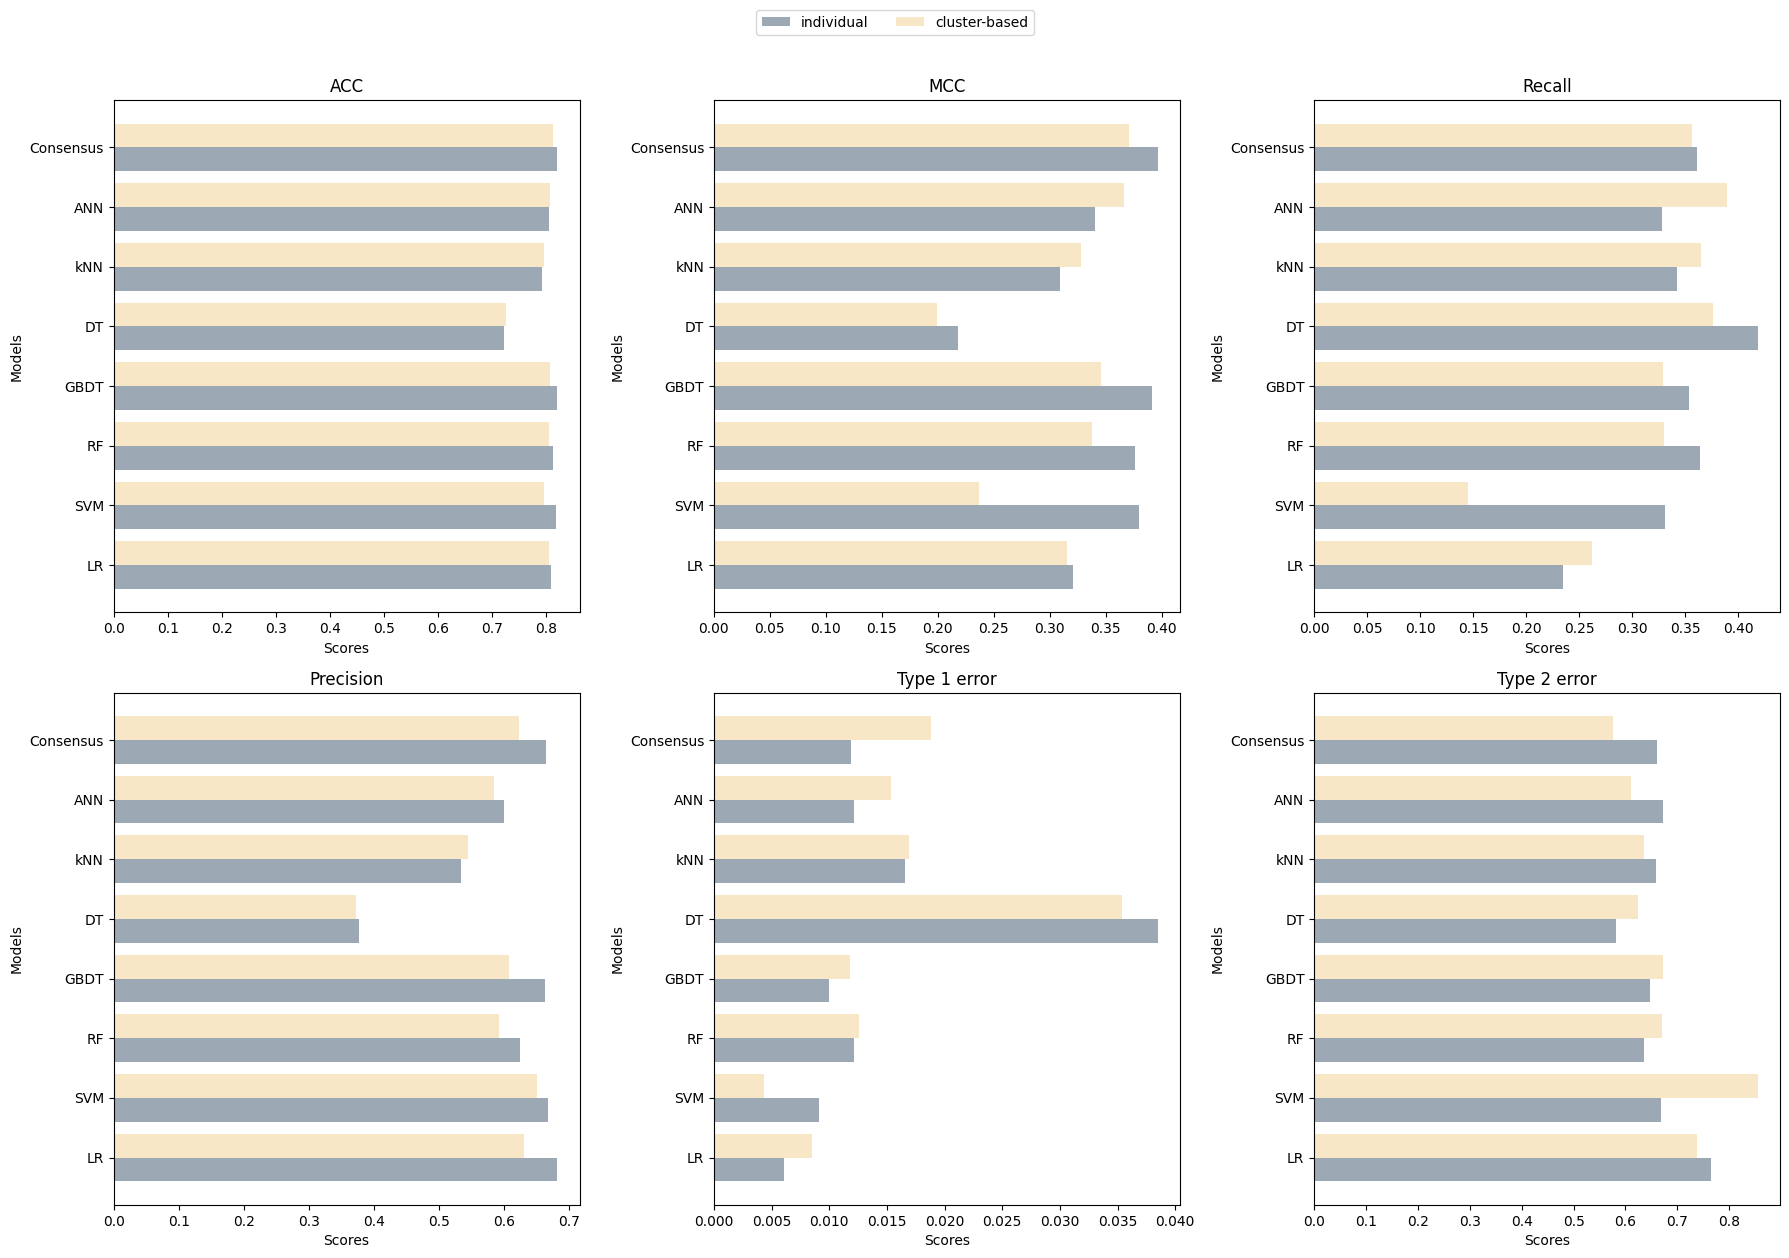

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called df with the given columns
# ...

# Define the metrics and model types
metrics = ["ACC", "MCC", "Recall", "Precision", "Type 1 error", "Type 2 error"]
unique_model_types = results_df["model_type"].unique()

# Plot the evaluation metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()
bar_height = 0.4
opacity = 0.8

# plot horizaontal bar plot

color_map = {model_type: color for model_type, color in zip(unique_model_types, ['#8394A2', '#F6E2B9'])} # Add more colors if needed

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    
    for i, model_type in enumerate(unique_model_types):
        model_type_data = results_df[results_df["model_type"] == model_type]
        ax.barh(np.arange(len(model_type_data)) + i * bar_height, model_type_data[metric], bar_height, alpha=opacity, color=color_map[model_type], label=model_type)
    
    ax.set_ylabel('Models')
    ax.set_xlabel('Scores')
    ax.set_title(metric)
    ax.set_yticks(np.arange(len(results_df["Model"].unique())) + bar_height / 2)
    ax.set_yticklabels(results_df["Model"].unique())
    # ax.legend()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(unique_model_types), bbox_to_anchor=(0.5, 1.05))


plt.tight_layout()
plt.show()

In [30]:
df.Risk.value_counts()

0    23364
1     6636
Name: Risk, dtype: int64